<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q3_SALARY_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

sample_data  YearsExperience,Salary.txt


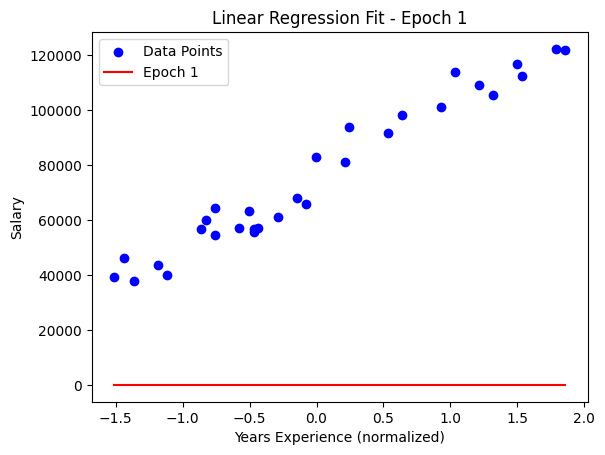

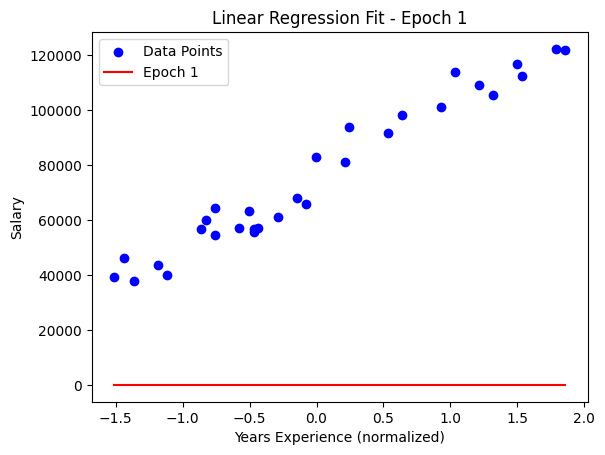

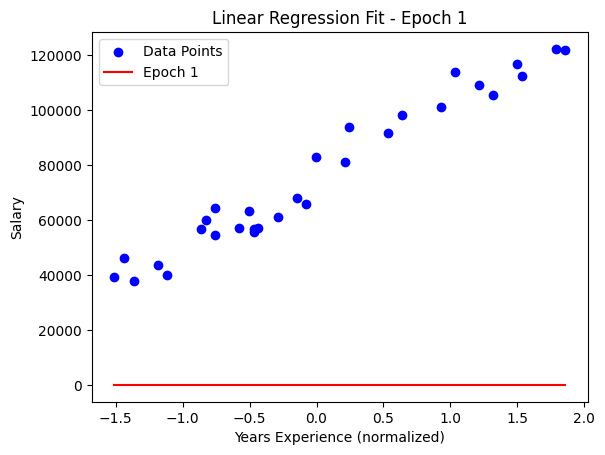

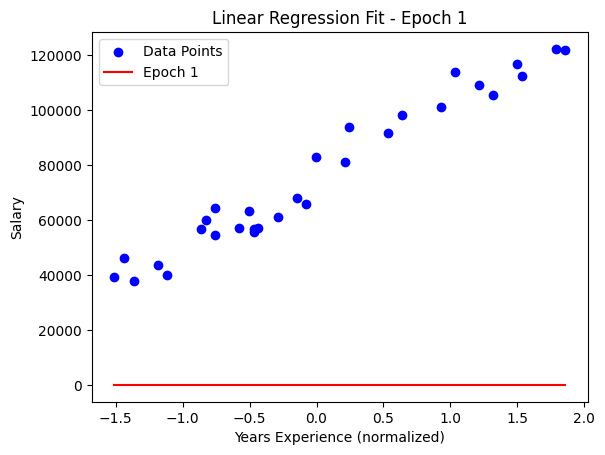

Best Learning Rate (α): 0.005
Final Cost: 1203053066.1630
R² Score: -2.3119
MAE: 46040.3705
MSE: 2406106132.3260


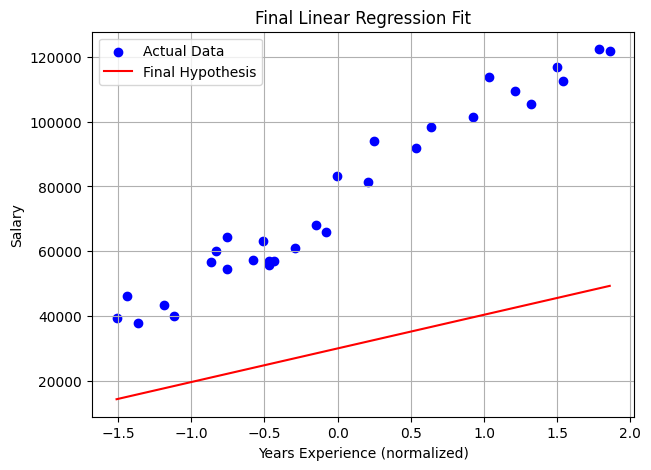

In [4]:
# Linear Regression using Gradient Descent (Manual Implementation)
# Dataset: YearsExperience,Salary.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------- Load Dataset ----------------
data = pd.read_csv("YearsExperience,Salary.txt")

X = data["YearsExperience"].values
y = data["Salary"].values
n = len(X)

# Feature scaling (Normalization)
X = (X - np.mean(X)) / np.std(X)

# ---------------- Helper Functions ----------------
def compute_cost(X, y, theta0, theta1):
    predictions = theta0 + theta1 * X
    errors = predictions - y
    cost = (1 / (2 * n)) * np.sum(errors ** 2)
    return cost

def gradient_descent(X, y, alpha, epochs):
    theta0, theta1 = 0, 0  # Initialize parameters
    cost_history = []

    plt.ion()  # Interactive plot for dynamic updates
    fig, ax = plt.subplots()

    for epoch in range(epochs):
        predictions = theta0 + theta1 * X
        error = predictions - y

        # Update parameters
        theta0 -= alpha * (1/n) * np.sum(error)
        theta1 -= alpha * (1/n) * np.sum(error * X)

        cost = compute_cost(X, y, theta0, theta1)
        cost_history.append(cost)

        # Plot after each epoch
        ax.clear()
        ax.scatter(X, y, color="blue", label="Data Points")
        ax.plot(X, predictions, color="red", label=f"Epoch {epoch+1}")
        ax.set_xlabel("Years Experience (normalized)")
        ax.set_ylabel("Salary")
        ax.legend()
        ax.set_title(f"Linear Regression Fit - Epoch {epoch+1}")
        plt.pause(0.3)

        # Stop early if cost change is small
        if epoch > 1 and abs(cost_history[-2] - cost_history[-1]) < 1e-3:
            break

    plt.ioff()
    plt.show()
    return theta0, theta1, cost_history

# ---------------- Hyperparameter Tuning ----------------
learning_rates = [0.0001, 0.0005, 0.001, 0.005]
best_alpha = 0
lowest_cost = float('inf')
best_thetas = (0, 0)

for alpha in learning_rates:
    theta0, theta1, cost_history = gradient_descent(X, y, alpha, 100)
    final_cost = cost_history[-1]
    if final_cost < lowest_cost:
        lowest_cost = final_cost
        best_alpha = alpha
        best_thetas = (theta0, theta1)

print(f"Best Learning Rate (α): {best_alpha}")
print(f"Final Cost: {lowest_cost:.4f}")

# ---------------- Final Model ----------------
theta0, theta1 = best_thetas
y_pred = theta0 + theta1 * X

# ---------------- Evaluation ----------------
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

# ---------------- Final Plot ----------------
plt.figure(figsize=(7,5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Final Hypothesis")
plt.title("Final Linear Regression Fit")
plt.xlabel("Years Experience (normalized)")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()